In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Load the sample dataset
data = pd.read_csv("E:\\pythonForDataScience\\Practice\\diamonds.csv")
df = pd.DataFrame(data)


In [12]:
df.head()# Display the first few rows of the DataFrame

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [13]:
df.tail()# Display the last few rows of the DataFrame

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [14]:
df.info()# Get a concise summary of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [19]:
df.columns
print()
df.shape# Get the number of rows and columns in the DataFrame

(53940, 10)

In [20]:
df.isna().sum()# Check for missing values in the DataFrame

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

# Data Visualization

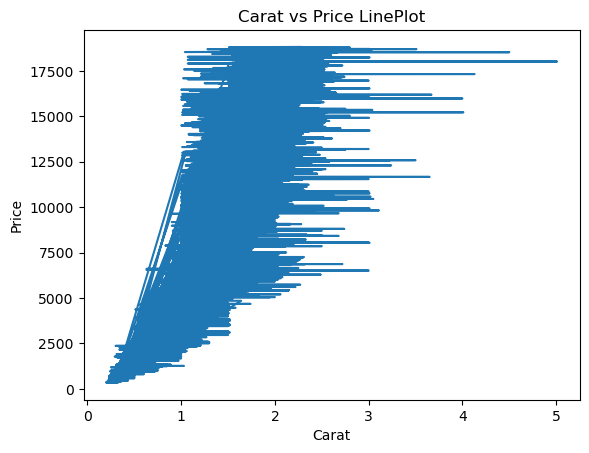

In [21]:
# Line Plot
plt.plot(df['carat'], df['price'])
plt.title('Carat vs Price LinePlot')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

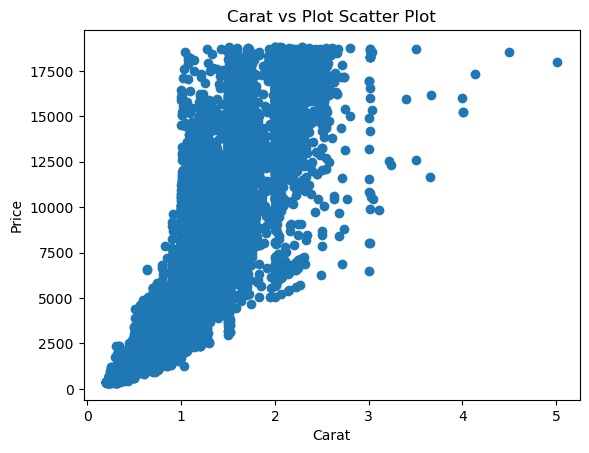

In [22]:
# Scatter Plot
plt.scatter(df['carat'], df['price'])
plt.title('Carat vs Plot Scatter Plot')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

## Insight:- 
##### Only Carat Cannot decide what should be the Price of the Diamond. Some Carat Values like 1 & 3 has different Carat value but with same price. we can't just decide price based only on carat

In [33]:
groupby_df = df.groupby('cut')['price']# Group by 'cut' and calculate the mean price
groupby_df.mean()

cut
Fair         4358.757764
Good         3928.864452
Ideal        3457.541970
Premium      4584.257704
Very Good    3981.759891
Name: price, dtype: float64

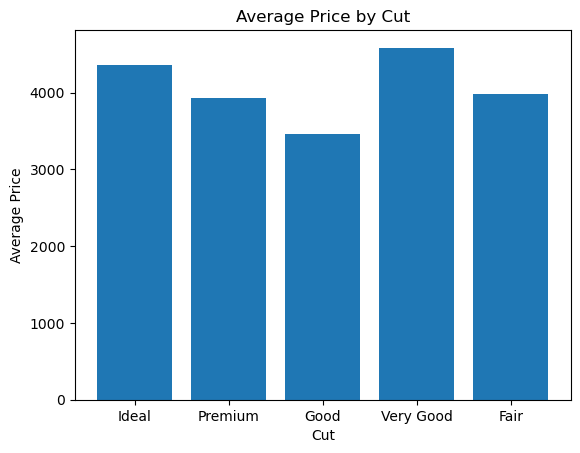

In [23]:
# Bar Plot
plt.bar(df['cut'].unique(), df.groupby('cut')['price'].mean())
plt.title('Average Price by Cut')
plt.xlabel('Cut')
plt.ylabel('Average Price')
plt.show()

## Insight:- 
##### We Cannot decide price based only on Carat(Weight) and Cut(Quality). Here, 'Very Good Cut' has highest of the Avarage Price where 'Ideal' is considered of highest in Quality 

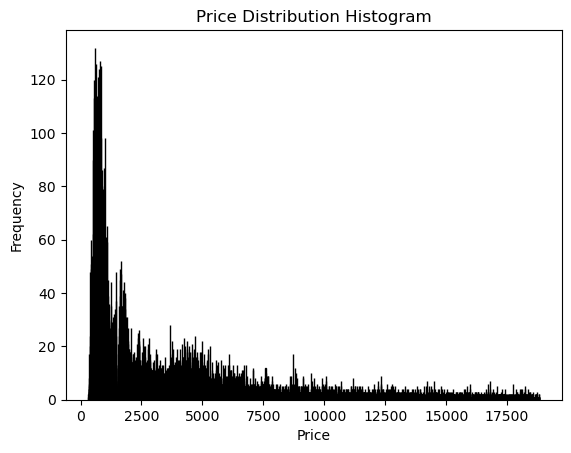

In [37]:
## INTERMEDIATE PLOTS WITH MATPLOTLIB
# Histogram
plt.hist(df['price'], bins = 100000 , edgecolor = 'black')
plt.title('Price Distribution Histogram')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

## Insight:-
##### No Matter how much data (Bins) i increase it would be same. We have a point between price(0 to 2500) where distribution is way higher than others

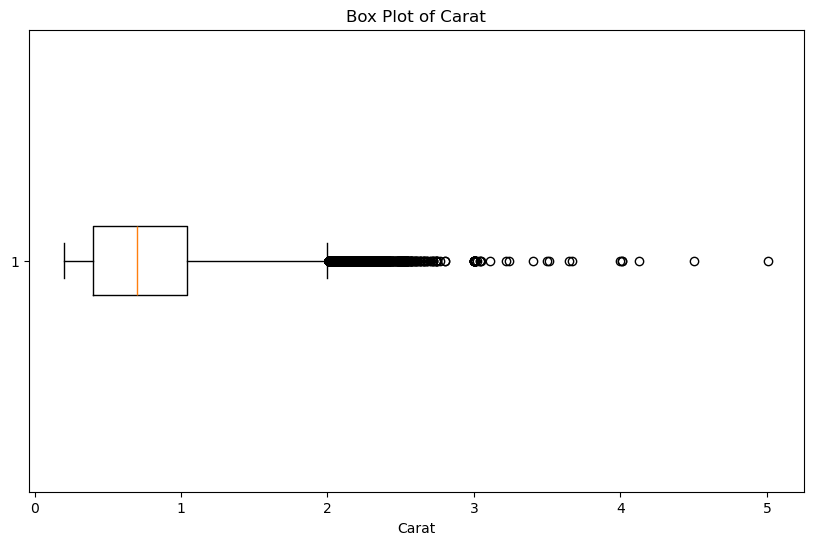

In [39]:
# Box Plot
plt.figure(figsize=(10, 6))
plt.boxplot(df['carat'], vert = False)
plt.title('Box Plot of Carat')
plt.xlabel('Carat')
plt.show()

## Insights:
##### 1-Most diamonds have carat values between Q1 and Q3 (the box). 
##### 2-The median shows the typical carat value. 
##### 3-Outliers (dots) indicate rare, unusually large diamonds. 
##### 4- If the box or whiskers are not centered, the data is skewed.

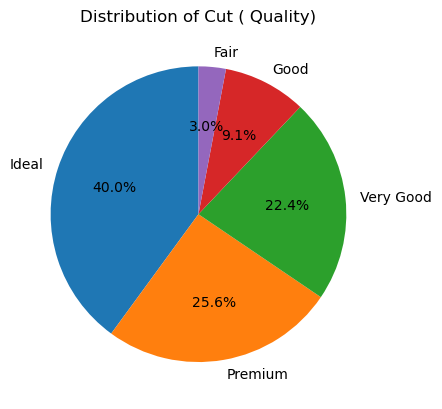

In [45]:
# Pie Chart
cut_count = df['cut'].value_counts()
plt.pie(cut_count, labels = cut_count.index , autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of Cut ( Quality)')
plt.show()

In [47]:
cut_count

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

## Insights:-
##### We have most of dta of cut is of 'Ideal Cut' i.e., About 40% . (This is Imbalance class/ Data)

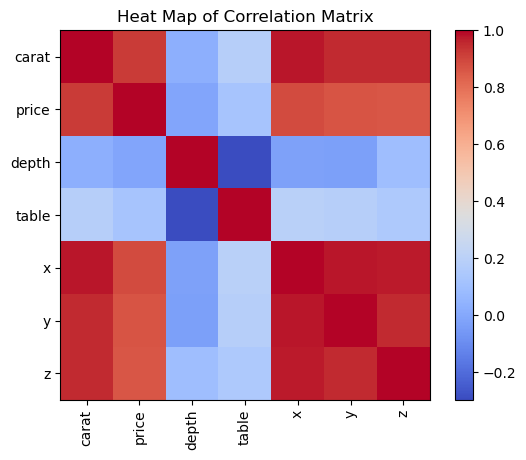

In [ ]:
## ADVANCED PLOTS USING MATPLOTLIB
# Heat Map
# You are creating a heatmap to visualize the correlation matrix of selected numerical features in your diamonds dataset.

# Step-by-step explanation:
correlation = df[['carat','price','depth','table','x','y','z']].corr()
#    - This line calculates the correlation matrix for the columns: carat, price, depth, table, x, y, z.
#    - Correlation measures the linear relationship between pairs of variables (values range from -1 to 1).
#    - A value close to 1 means strong positive correlation, -1 means strong negative correlation, and 0 means no correlation.

plt.imshow(correlation, cmap = 'coolwarm' , interpolation= 'none')
#    - This displays the correlation matrix as an image (heatmap).
#    - cmap='coolwarm' sets the color map, where blue and red indicate negative and positive correlations, respectively.
#    - interpolation='none' ensures each cell is colored without smoothing.

plt.colorbar()
#    - Adds a color bar to the side, showing the mapping from color to correlation value.

plt.xticks(range(len(correlation)), correlation.columns, rotation = 90)
#    - Sets the x-axis tick labels to the column names, rotated for readability.

plt.yticks(range(len(correlation)), correlation.columns)
#    - Sets the y-axis tick labels to the column names.

plt.title('Heat Map of Correlation Matrix')
#    - Adds a title to the plot.

plt.show()
#    - Displays the plot.

# Why these parameters?
# - You chose these columns because they are numerical and relevant for understanding relationships in the dataset.
# - The heatmap visually summarizes how strongly each pair of features is related, helping to identify patterns or redundancy in the data.

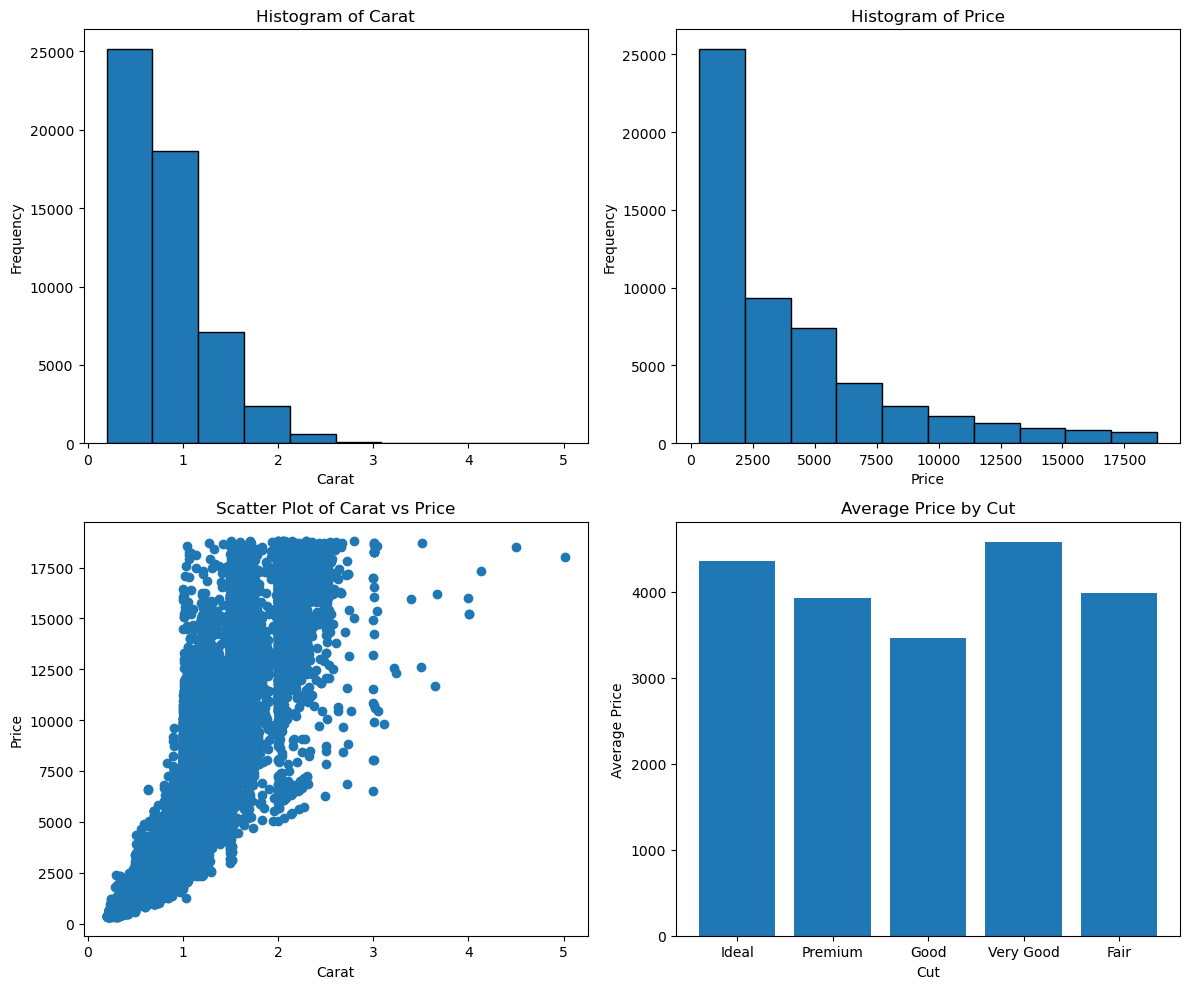

In [ ]:
### SUB - PLOT
fig, axis = plt.subplots(2,2,figsize=((12,10)))
#    - This creates a subplot with 1 row and 2 columns, allowing you to display multiple plots in one figure.
axis[0,0].hist(df['carat'], bins = 10, edgecolor = 'black')
axis[0,0].set_title("Histogram of Carat")
axis[0,0].set_xlabel("Carat")
axis[0,0].set_ylabel("Frequency")

axis[0,1].hist(df['price'], bins = 10 , edgecolor = 'black')
axis[0,1].set_title("Histogram of Price")
axis[0,1].set_xlabel("Price")
axis[0,1].set_ylabel("Frequency")

axis[1,0].scatter(df['carat'], df['price'])
axis[1,0].set_title("Scatter Plot of Carat vs Price")
axis[1,0].set_xlabel("Carat")
axis[1,0].set_ylabel("Price")

axis[1,1].bar(df['cut'].unique(), df.groupby('cut')['price'].mean())
axis[1,1].set_title("Average Price by Cut")
axis[1,1].set_xlabel("Cut")
axis[1,1].set_ylabel("Average Price")

plt.tight_layout()
plt.show()

#  SEABORN VISUALIZATION

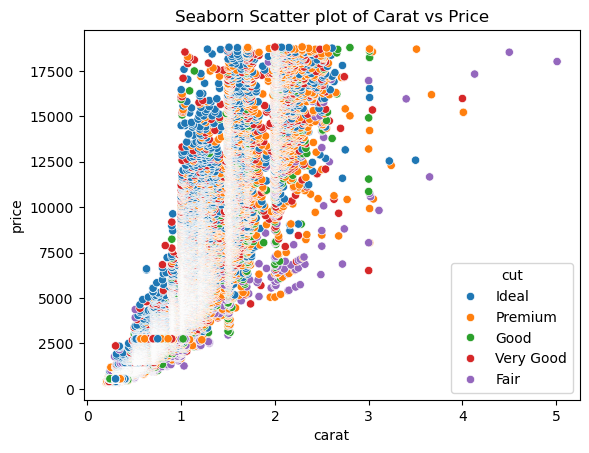

In [ ]:
sns.scatterplot(x = 'carat' , y = 'price' , data = df , hue = 'cut') #cut ke basis pe color change hoga us coordinate point ka
plt.title('Seaborn Scatter plot of Carat vs Price')
plt.show()

## Insight:- 
##### Data Points are displayed on basis of comparison between 'carat' and 'price', which is in different hue color on basis of 'cut' . So, one could differentiate whether which cut type has more or less carat value & it's correspondent price

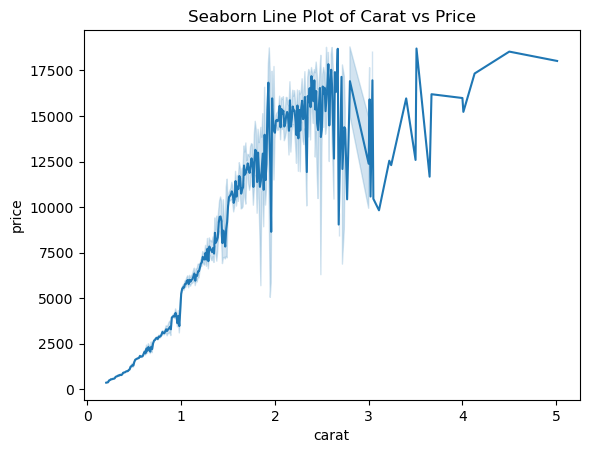

In [61]:
# Lineplot
sns.lineplot( x = 'carat' , y = 'price' , data = df)
plt.title('Seaborn Line Plot of Carat vs Price')
plt.show()

## Insight:- 
##### In Line Plot, we have understood about a basic trend i.e., How price increases as carat changes. (for us line plot automatically calculates the 'Mean' & ' Standard Deviation')